In [1]:
import tensorflow as tf

In [2]:
!pip install -U git+https://github.com/qubvel/efficientnet


  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-y1p6rhop
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/efficientnet /tmp/pip-req-build-y1p6rhop
  Resolved https://github.com/qubvel/efficientnet to commit f7f3e736c113b872caf53dae9fbbda996a8eb87d
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18425 sha256=e8eca624585dd56d38d0a869b9c2926da3377cef4a2ae30e7d8d48bab49ad37a
  Stored in directory: /tmp/pip-ephem-wheel-cache-e3e6pqbq/wheels/bb/0f/38/154505705a0899276d49f521ee621a61bc2a8767026220f751
Successfully built efficientnet


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
train_dir="/content/drive/MyDrive/preprocessing_baru"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=45,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    height_shift_range=0.2,
    width_shift_range=0.2,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256),
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [18]:
def head(x_input):
    x= tf.keras.layers.Flatten()(x_input)
    x= tf.keras.layers.Dense(512,activation='relu')(x)
    x= tf.keras.layers.Dense(256,activation='relu')(x)
    x= tf.keras.layers.Dense(2,activation='softmax')(x)
    return x

In [19]:
import efficientnet.tfkeras as efn

eff_base=efn.EfficientNetB7(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)
eff_base.trainable=False
model=tf.keras.Model(eff_base.input,head(eff_base.output))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
history=model.fit(train_generator,validation_data=validation_generator,
          epochs=20,batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 101s 29s/step - accuracy: 0.4062 - loss: 10.0099 - val_accuracy: 0.5000 - val_loss: 120.4965
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 919ms/step - accuracy: 0.4896 - loss: 154.5415 - val_accuracy: 0.9375 - val_loss: 0.0629
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - accuracy: 0.8125 - loss: 4.5871 - val_accuracy: 0.7500 - val_loss: 6.2309
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 691ms/step - accuracy: 0.7188 - loss: 14.2041 - val_accuracy: 0.9375 - val_loss: 0.1157
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 839ms/step - accuracy: 0.7083 - loss: 9.7754 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 944ms/step - accuracy: 0.8958 - loss: 1.9764 - val_accuracy: 0.8125 - val_loss: 3.0544
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 695ms/step - accuracy: 0.8021 - loss: 6.1191 - val_accuracy: 0.8125 - val_loss: 5.2488
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 678ms/step - accuracy: 0.8438 - loss: 4.1471 - val_accuracy: 1.0000 - val_loss:

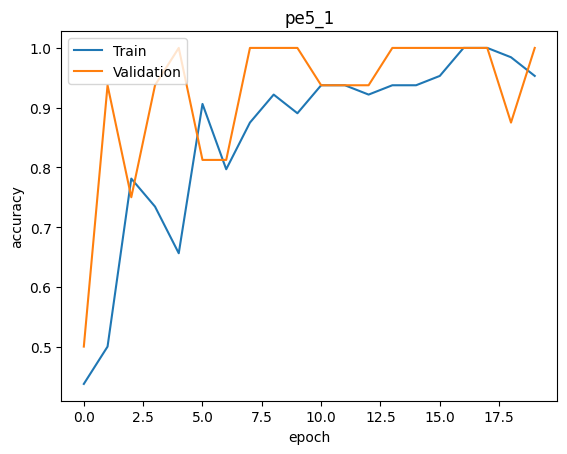

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('pe5_1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [23]:
model.save('rice_model_softmax.h5')

In [91]:
from tensorflow.keras.preprocessing import image
import numpy as np

# test_model=tf.keras.models.load_model('rice_model_softmax.h5')
test_model=tf.keras.models.load_model('rice_model.h5')

class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}


In [95]:

# img_path = "/content/drive/MyDrive/preprocessing_baru/brown_spot/DSC_0337.JPG"
img_path="/content/drive/MyDrive/preprocessing_baru/healthy/IMG_20190424_130737.jpg"
img = image.load_img(img_path)  # Load as-is
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
result = test_model.predict(img_array)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[1.]]


In [96]:
result[0][0]

1.0

In [97]:
# binary
probability = result[0][0]
predicted_class_index = 1 if probability > 0.5 else 0
print(predicted_class_index)
predicted_class = class_labels[predicted_class_index]
print(predicted_class)


1
healthy


In [90]:
## categorical

# predicted_class_index = 1 if result[0][1] > result[0][0] else 0
# print(predicted_class_index)
# predicted_class = class_labels[predicted_class_index]
# print(predicted_class)


0
brown_spot
